# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [86]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [87]:
print(cities)

['akyab', 'kapaa', 'punta arenas', 'barawe', 'kinablangan', 'brae', 'kautokeino', 'kavaratti', 'nizhneyansk', 'luderitz', 'urumqi', 'guerrero negro', 'butaritari', 'port alfred', 'inta', 'avarua', 'hilo', 'upernavik', 'new norfolk', 'okha', 'saskylakh', 'talaya', 'argetoaia', 'olafsvik', 'cherskiy', 'namibe', 'rikitea', 'jamestown', 'yellowknife', 'georgetown', 'hermanus', 'shimoda', 'tuktoyaktuk', 'busselton', 'bredasdorp', 'dikson', 'vaini', 'barrow', 'hami', 'taolanaro', 'neon karlovasion', 'cazones', 'gaillac', 'mar del plata', 'port elizabeth', 'christiana', 'ribeira grande', 'ushuaia', 'asau', 'coquimbo', 'east london', 'cortez', 'codrington', 'mataura', 'wiwili', 'bani', 'hasaki', 'chuy', 'thompson', 'lima', 'asyut', 'leningradskiy', 'bilibino', 'rio grande', 'tarudant', 'palabuhanratu', 'baruun-urt', 'qaanaaq', 'ikungi', 'rio gallegos', 'straumen', 'sur', 'albany', 'mergui', 'eureka', 'japura', 'pozo colorado', 'kupang', 'chichibu', 'anadyr', 'camacupa', 'copiapo', 'bac lieu', 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [88]:
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Create empty arrays and set initial values for variables
weather_data = []

# For loop to pull data for a small number of cities at a time
def api_call(x, y, set):
    count = 1
    for city in cities[x:y]:
        city_url = url + f"{city}&units=imperial&appid={weather_api_key}"
        weather_call = requests.get(city_url).json()
        weather_data.append(weather_call)

        if weather_call['cod'] == '404':
            print('City not found. Skipping...')
        else:
            print(f"Processing Record {count} of Set {set} | {city}")
            count += 1

In [89]:
# Process 50 cities at a time through api_call function
api_call(0,49,1)

Processing Record 1 of Set 1 | akyab
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 4 of Set 1 | kinablangan
Processing Record 5 of Set 1 | brae
Processing Record 6 of Set 1 | kautokeino
Processing Record 7 of Set 1 | kavaratti
City not found. Skipping...
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | urumqi
Processing Record 10 of Set 1 | guerrero negro
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | inta
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | okha
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | talaya
Processing Record 21 of Set 1 | argetoaia
Processing Record 22 of Set 1 | olafsvik
Processing Record 23 of Set 1 | cherskiy
Processing 

In [90]:
pprint(weather_data)

00,
  'coord': {'lat': 53.57, 'lon': 142.95},
  'dt': 1584930811,
  'id': 2122614,
  'main': {'feels_like': 10.62,
           'grnd_level': 1005,
           'humidity': 88,
           'pressure': 1009,
           'sea_level': 1009,
           'temp': 22.05,
           'temp_max': 22.05,
           'temp_min': 22.05},
  'name': 'Okha',
  'sys': {'country': 'RU', 'sunrise': 1584908607, 'sunset': 1584953162},
  'timezone': 39600,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 310, 'speed': 11.27}},
 {'base': 'stations',
  'clouds': {'all': 64},
  'cod': 200,
  'coord': {'lat': 71.92, 'lon': 114.08},
  'dt': 1584930811,
  'id': 2017155,
  'main': {'feels_like': -32.55,
           'grnd_level': 995,
           'humidity': 94,
           'pressure': 1005,
           'sea_level': 1005,
           'temp': -19.71,
           'temp_max': -19.71,
           'temp_min': -19.71},
  'name':

In [91]:
# Process 50 cities at a time through api_call function
api_call(50,99,2)

Processing Record 1 of Set 2 | east london
Processing Record 2 of Set 2 | cortez
Processing Record 3 of Set 2 | codrington
Processing Record 4 of Set 2 | mataura
Processing Record 5 of Set 2 | wiwili
Processing Record 6 of Set 2 | bani
Processing Record 7 of Set 2 | hasaki
Processing Record 8 of Set 2 | chuy
Processing Record 9 of Set 2 | thompson
Processing Record 10 of Set 2 | lima
Processing Record 11 of Set 2 | asyut
Processing Record 12 of Set 2 | leningradskiy
Processing Record 13 of Set 2 | bilibino
Processing Record 14 of Set 2 | rio grande
City not found. Skipping...
City not found. Skipping...
Processing Record 15 of Set 2 | baruun-urt
Processing Record 16 of Set 2 | qaanaaq
Processing Record 17 of Set 2 | ikungi
Processing Record 18 of Set 2 | rio gallegos
Processing Record 19 of Set 2 | straumen
Processing Record 20 of Set 2 | sur
Processing Record 21 of Set 2 | albany
City not found. Skipping...
Processing Record 22 of Set 2 | eureka
Processing Record 23 of Set 2 | japura


In [92]:
# Process ~50 cities at a time through api_call function
api_call(100,149,3)

City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 3 | alofi
Processing Record 2 of Set 3 | cabo san lucas
Processing Record 3 of Set 3 | carnarvon
Processing Record 4 of Set 3 | awjilah
Processing Record 5 of Set 3 | zhigansk
Processing Record 6 of Set 3 | batticaloa
Processing Record 7 of Set 3 | ust-maya
Processing Record 8 of Set 3 | fortuna
Processing Record 9 of Set 3 | cordoba
Processing Record 10 of Set 3 | nemuro
Processing Record 11 of Set 3 | lata
Processing Record 12 of Set 3 | santa ines
City not found. Skipping...
Processing Record 13 of Set 3 | narsaq
Processing Record 14 of Set 3 | petropavlovsk-kamchatskiy
Processing Record 15 of Set 3 | saint-philippe
Processing Record 16 of Set 3 | tahe
Processing Record 17 of Set 3 | alta floresta
Processing Record 18 of Set 3 | husavik
Processing Record 19 of Set 3 | la asuncion
Processing Record 20 of Set 3 | erenhot
Processing Record 21 of Set 3 | north berwick
Processing Record 22 of Set 3 | hears

In [93]:
# Process ~50 cities at a time through api_call function
api_call(150,199,4)

City not found. Skipping...
Processing Record 1 of Set 4 | kangaatsiaq
Processing Record 2 of Set 4 | kailua
Processing Record 3 of Set 4 | muros
Processing Record 4 of Set 4 | dunmore east
Processing Record 5 of Set 4 | atuona
Processing Record 6 of Set 4 | calabozo
Processing Record 7 of Set 4 | joshimath
City not found. Skipping...
Processing Record 8 of Set 4 | chokurdakh
Processing Record 9 of Set 4 | norman wells
Processing Record 10 of Set 4 | fort nelson
Processing Record 11 of Set 4 | mchinji
Processing Record 12 of Set 4 | cartagena
Processing Record 13 of Set 4 | ancud
Processing Record 14 of Set 4 | saint george
Processing Record 15 of Set 4 | aksarka
Processing Record 16 of Set 4 | sukpak
Processing Record 17 of Set 4 | zhangye
Processing Record 18 of Set 4 | cape town
Processing Record 19 of Set 4 | kushiro
Processing Record 20 of Set 4 | richards bay
City not found. Skipping...
Processing Record 21 of Set 4 | sao filipe
Processing Record 22 of Set 4 | souillac
Processing

In [94]:
# Process ~50 cities at a time through api_call function
api_call(200,249,5)

Processing Record 1 of Set 5 | ponta do sol
Processing Record 2 of Set 5 | uribia
City not found. Skipping...
Processing Record 3 of Set 5 | tarakan
Processing Record 4 of Set 5 | kamenka
Processing Record 5 of Set 5 | sorland
City not found. Skipping...
City not found. Skipping...
Processing Record 6 of Set 5 | linxia
Processing Record 7 of Set 5 | port blair
Processing Record 8 of Set 5 | lakes entrance
City not found. Skipping...
Processing Record 9 of Set 5 | wagar
Processing Record 10 of Set 5 | kishanganj
Processing Record 11 of Set 5 | vostok
Processing Record 12 of Set 5 | mehamn
Processing Record 13 of Set 5 | quatre cocos
Processing Record 14 of Set 5 | itapirapua
Processing Record 15 of Set 5 | danville
Processing Record 16 of Set 5 | lorengau
Processing Record 17 of Set 5 | phan thiet
Processing Record 18 of Set 5 | la ronge
Processing Record 19 of Set 5 | maniitsoq
Processing Record 20 of Set 5 | deputatskiy
Processing Record 21 of Set 5 | wadsworth
Processing Record 22 of

In [95]:
# Process ~50 cities at a time through api_call function
api_call(250,299,6)

Processing Record 1 of Set 6 | wonthaggi
Processing Record 2 of Set 6 | axim
Processing Record 3 of Set 6 | bay roberts
Processing Record 4 of Set 6 | omboue
Processing Record 5 of Set 6 | rajapur
City not found. Skipping...
Processing Record 6 of Set 6 | mahebourg
Processing Record 7 of Set 6 | priargunsk
Processing Record 8 of Set 6 | upata
Processing Record 9 of Set 6 | visnes
Processing Record 10 of Set 6 | nanortalik
City not found. Skipping...
Processing Record 11 of Set 6 | bengkulu
Processing Record 12 of Set 6 | toba
Processing Record 13 of Set 6 | butterworth
Processing Record 14 of Set 6 | baganga
Processing Record 15 of Set 6 | noumea
Processing Record 16 of Set 6 | road town
Processing Record 17 of Set 6 | college
Processing Record 18 of Set 6 | khovu-aksy
Processing Record 19 of Set 6 | moscow
Processing Record 20 of Set 6 | pangnirtung
Processing Record 21 of Set 6 | tarnogskiy gorodok
Processing Record 22 of Set 6 | vila franca do campo
Processing Record 23 of Set 6 | e

In [96]:
# Process ~50 cities at a time through api_call function
api_call(300,349,7)

Processing Record 1 of Set 7 | horsham
Processing Record 2 of Set 7 | avera
City not found. Skipping...
Processing Record 3 of Set 7 | san carlos
Processing Record 4 of Set 7 | rawson
Processing Record 5 of Set 7 | abonnema
Processing Record 6 of Set 7 | khani
Processing Record 7 of Set 7 | point fortin
Processing Record 8 of Set 7 | offa
Processing Record 9 of Set 7 | baykit
Processing Record 10 of Set 7 | monte alegre de minas
Processing Record 11 of Set 7 | torbay
Processing Record 12 of Set 7 | nouadhibou
Processing Record 13 of Set 7 | marabba
Processing Record 14 of Set 7 | bagdarin
Processing Record 15 of Set 7 | batagay-alyta
Processing Record 16 of Set 7 | cidreira
City not found. Skipping...
Processing Record 17 of Set 7 | salamiyah
Processing Record 18 of Set 7 | matara
Processing Record 19 of Set 7 | fernley
Processing Record 20 of Set 7 | klaksvik
Processing Record 21 of Set 7 | gizo
Processing Record 22 of Set 7 | puerto leguizamo
Processing Record 23 of Set 7 | southbrid

In [97]:
# Process ~50 cities at a time through api_call function
api_call(350,399,8)

Processing Record 1 of Set 8 | qianan
Processing Record 2 of Set 8 | kirakira
Processing Record 3 of Set 8 | altea
Processing Record 4 of Set 8 | marsh harbour
Processing Record 5 of Set 8 | airai
Processing Record 6 of Set 8 | shingu
Processing Record 7 of Set 8 | alvaraes
Processing Record 8 of Set 8 | grindavik
Processing Record 9 of Set 8 | evensk
Processing Record 10 of Set 8 | wattegama
Processing Record 11 of Set 8 | scarborough
Processing Record 12 of Set 8 | tinqueux
Processing Record 13 of Set 8 | bowen
Processing Record 14 of Set 8 | bilma
Processing Record 15 of Set 8 | port hardy
Processing Record 16 of Set 8 | hue
Processing Record 17 of Set 8 | samarai
City not found. Skipping...
Processing Record 18 of Set 8 | turayf
Processing Record 19 of Set 8 | cayenne
Processing Record 20 of Set 8 | vardo
Processing Record 21 of Set 8 | nichinan
Processing Record 22 of Set 8 | astara
Processing Record 23 of Set 8 | godda
City not found. Skipping...
Processing Record 24 of Set 8 | f

In [98]:
# Process ~50 cities at a time through api_call function
api_call(400,449,9)

Processing Record 1 of Set 9 | kununurra
Processing Record 2 of Set 9 | iqaluit
City not found. Skipping...
Processing Record 3 of Set 9 | comodoro rivadavia
Processing Record 4 of Set 9 | darnah
Processing Record 5 of Set 9 | high rock
City not found. Skipping...
Processing Record 6 of Set 9 | viedma
Processing Record 7 of Set 9 | geraldton
Processing Record 8 of Set 9 | pavlovo
Processing Record 9 of Set 9 | solnechnyy
Processing Record 10 of Set 9 | finschhafen
Processing Record 11 of Set 9 | srandakan
City not found. Skipping...
Processing Record 12 of Set 9 | aguimes
City not found. Skipping...
Processing Record 13 of Set 9 | port hedland
Processing Record 14 of Set 9 | touros
Processing Record 15 of Set 9 | nelson bay
City not found. Skipping...
Processing Record 16 of Set 9 | tacuarembo
Processing Record 17 of Set 9 | trairi
Processing Record 18 of Set 9 | tual
Processing Record 19 of Set 9 | huarmey
Processing Record 20 of Set 9 | vaitape
Processing Record 21 of Set 9 | edd
Pro

In [99]:
# Process ~50 cities at a time through api_call function
api_call(450,499,10)

Processing Record 1 of Set 10 | southampton
Processing Record 2 of Set 10 | acapulco
Processing Record 3 of Set 10 | bowling green
Processing Record 4 of Set 10 | vallentuna
Processing Record 5 of Set 10 | popondetta
Processing Record 6 of Set 10 | mitzic
Processing Record 7 of Set 10 | mareeba
City not found. Skipping...
Processing Record 8 of Set 10 | san isidro
Processing Record 9 of Set 10 | amga
Processing Record 10 of Set 10 | lubana
Processing Record 11 of Set 10 | taoudenni
Processing Record 12 of Set 10 | nuuk
Processing Record 13 of Set 10 | ballangen
Processing Record 14 of Set 10 | grande prairie
Processing Record 15 of Set 10 | pisco
Processing Record 16 of Set 10 | bongandanga
Processing Record 17 of Set 10 | nacala
Processing Record 18 of Set 10 | virginia beach
Processing Record 19 of Set 10 | general roca
Processing Record 20 of Set 10 | massape
Processing Record 21 of Set 10 | kassala
Processing Record 22 of Set 10 | sambava
City not found. Skipping...
Processing Reco

In [100]:
# Process ~50 cities at a time through api_call function
api_call(500,549,11)

Processing Record 1 of Set 11 | luanda
Processing Record 2 of Set 11 | doha
Processing Record 3 of Set 11 | mayo
Processing Record 4 of Set 11 | mezhdurechensk
Processing Record 5 of Set 11 | bloemfontein
Processing Record 6 of Set 11 | bollnas
Processing Record 7 of Set 11 | ouallam
Processing Record 8 of Set 11 | puerto suarez
Processing Record 9 of Set 11 | nikel
Processing Record 10 of Set 11 | matiri
Processing Record 11 of Set 11 | tuxpan
Processing Record 12 of Set 11 | byron bay
Processing Record 13 of Set 11 | asmar
Processing Record 14 of Set 11 | zacualpan
Processing Record 15 of Set 11 | egvekinot
Processing Record 16 of Set 11 | sisimiut
Processing Record 17 of Set 11 | vyartsilya
Processing Record 18 of Set 11 | collie
Processing Record 19 of Set 11 | daye
Processing Record 20 of Set 11 | hervey bay
Processing Record 21 of Set 11 | santa isabel do rio negro
Processing Record 22 of Set 11 | cam ranh
Processing Record 23 of Set 11 | vityazevo
Processing Record 24 of Set 11 

In [101]:
# Process ~50 cities at a time through api_call function
api_call(550,599,10)

Processing Record 1 of Set 10 | vrangel
City not found. Skipping...
Processing Record 2 of Set 10 | sharkan
Processing Record 3 of Set 10 | okhotsk
Processing Record 4 of Set 10 | sao felix do xingu
Processing Record 5 of Set 10 | saltpond
Processing Record 6 of Set 10 | maneadero
Processing Record 7 of Set 10 | neepawa
Processing Record 8 of Set 10 | barbastro
Processing Record 9 of Set 10 | ottawa
Processing Record 10 of Set 10 | santo domingo
Processing Record 11 of Set 10 | markova
Processing Record 12 of Set 10 | englewood
Processing Record 13 of Set 10 | leshukonskoye
Processing Record 14 of Set 10 | morant bay
Processing Record 15 of Set 10 | muzhi
Processing Record 16 of Set 10 | nome
Processing Record 17 of Set 10 | moa
Processing Record 18 of Set 10 | owosso
Processing Record 19 of Set 10 | tilichiki
Processing Record 20 of Set 10 | poplar bluff
Processing Record 21 of Set 10 | gonen
Processing Record 22 of Set 10 | broken hill
Processing Record 23 of Set 10 | plauen
Processi

In [102]:
# Process ~50 cities at a time through api_call function
api_call(600,649,12)

Processing Record 1 of Set 12 | hamilton
Processing Record 2 of Set 12 | westport
Processing Record 3 of Set 12 | mersing
Processing Record 4 of Set 12 | gubkinskiy
Processing Record 5 of Set 12 | lixourion
Processing Record 6 of Set 12 | tazmalt
Processing Record 7 of Set 12 | balkanabat
Processing Record 8 of Set 12 | kitimat
Processing Record 9 of Set 12 | shieli
Processing Record 10 of Set 12 | charters towers


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [103]:
# Convert output to a dataframe
weather_df = pd.DataFrame(weather_data)
weather_df.head(1)

,coord,weather,base,main,wind,clouds,dt,sys,timezone,id,name,cod,visibility,message,rain,snow
0,"{'lon': 92.9, 'lat': 20.15}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 77.67, 'feels_like': 75.76, 'temp_min...","{'speed': 8.32, 'deg': 315}",{'all': 0},1.584931e+09,"{'country': 'MM', 'sunrise': 1584920984, 'suns...",23400.0,1295765.0,Sittwe,200,NaN,NaN,NaN,NaN


In [104]:
# Save values needed for scatter plots as series
df_coord = weather_df['coord'].apply(pd.Series)
lat_series = df_coord['lat']
lng_series = df_coord['lon']

df_main = weather_df['main'].apply(pd.Series)
temp_series = df_main['temp_max']
humidity_series = df_main['humidity']

df_clouds = weather_df['clouds'].apply(pd.Series)
clouds_series = df_clouds['all']

df_wind = weather_df['wind'].apply(pd.Series)
wind_series = df_wind['speed']

date_series = weather_df['dt'].apply(pd.Series)

city_series = weather_df['name'].apply(pd.Series)

df_country = weather_df['sys'].apply(pd.Series)
country_series = df_country['country']
date_series

,0
0,1.584931e+09
1,1.584931e+09
2,1.584931e+09
3,NaN
4,1.584931e+09
...,...
593,1.584931e+09
594,1.584931e+09
595,1.584931e+09
596,1.584931e+09


In [105]:
wind_series

0       8.32
1      18.34
2      11.41
3        NaN
4       7.20
       ...  
593     5.82
594    11.05
595     3.36
596    21.43
597    15.52
Name: speed, Length: 598, dtype: float64

In [106]:
weather_df_final = pd.concat([city_series,country_series,lat_series,lng_series,temp_series, humidity_series, clouds_series, wind_series, date_series], axis=1)

weather_df_final.count()

0           535
country     535
lat         535
lon         535
temp_max    535
humidity    535
all         535
speed       535
0           535
dtype: int64

In [107]:
# Save weather data to csv file
weather_df_final.to_csv("Weather_Pycode_Data.csv",encoding="utf-8",index=False)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

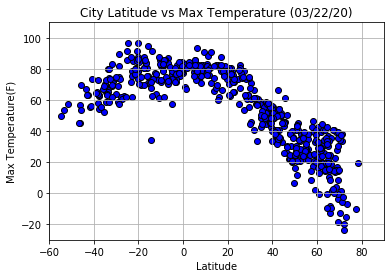

In [114]:
# Create first scatter plot
plt.scatter(lat_series,temp_series,marker="o",facecolors='b',edgecolors='k')
plt.ylim(-30,110)
plt.xlim(-60,90)
plt.grid()

# Enter labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title('City Latitude vs Max Temperature (03/22/20)')

# Save plot
plt.savefig("Plot_Lat_MaxTemp.png")

# This scatter plot uses city data with latitude as the x-axis and max temperature as the y-axis. As latitude increases from 20 to 80 degrees, the max temperature decreases. The max temperature also decreases from -30 to -60 degrees. The maximum temperatures of the dataset occur between -30 to 20 degrees.

#### Latitude vs. Humidity Plot

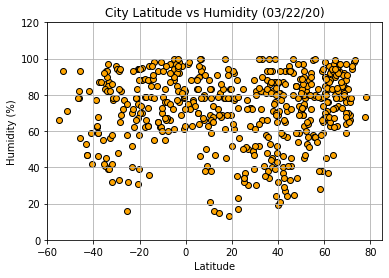

In [122]:
# Create next scatter plot
plt.scatter(lat_series,humidity_series,marker="o",facecolors='orange',edgecolors='k')
plt.ylim(0,120)
plt.xlim(-60,85)
plt.grid()

# Enter labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (03/22/20)')

# Save plot
plt.savefig("Plot_Lat_Humidity.png")

# This scatter plot uses city data with latitude as the x-axis and humidity as the y-axis. The maximum humidity of the cities in the dataset is 100%, while the minimum value is close to 5%. Based on visual inspection, there does not appear to be a correlation between latitude and humidity.

#### Latitude vs. Cloudiness Plot

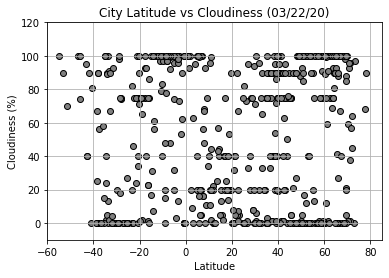

In [121]:
# Create next scatter plot
plt.scatter(lat_series,clouds_series,marker="o",facecolors='gray',edgecolors='k')
plt.ylim(-10,120)
plt.xlim(-60,85)
plt.grid()

# Enter labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (03/22/20)')

# Save plot
plt.savefig("Plot_Lat_Cloudiness.png")

# This scatter plot uses city data with latitude as the x-axis and cloudiness as the y-axis. Cloudiness within the dataset ranges from 0% to 100%. Based on visual inspection, there does not appear to be a correlation between latitude and cloudiness.

#### Latitude vs. Wind Speed Plot

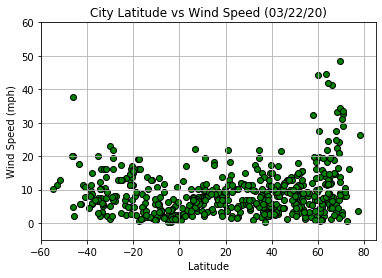

In [125]:
# Create next scatter plot
plt.scatter(lat_series,wind_series,marker="o",facecolors='green',edgecolors='k')
plt.ylim(-5,60)
plt.xlim(-60,85)
plt.grid()

# Enter labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (03/22/20)')

# Save plot
plt.savefig("Plot_Lat_Wind.png")

# This scatter plot uses city data with latitude as the x-axis and wind speed as the y-axis. The maximum wind speeds occur around a latitude of -50 and a latitude of 60 to 70. There may be a correlation between wind speed and latitude since the majority of high wind speeds occur at a latitude of 55 degrees and above.

## Linear Regression

In [109]:
# OPTIONAL: Create a function to create Linear Regression plots


In [110]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


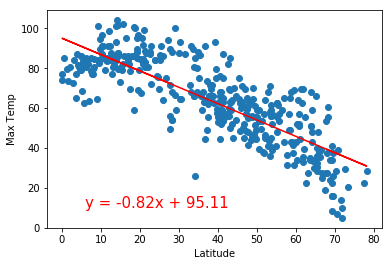

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


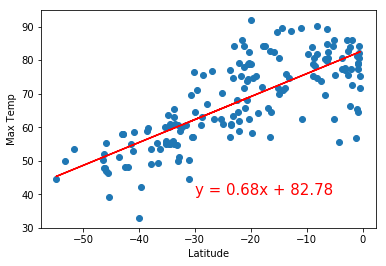

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


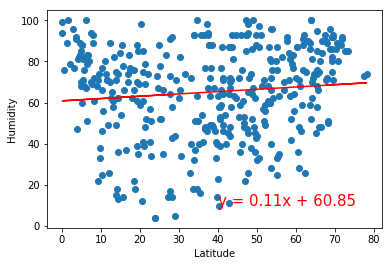

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


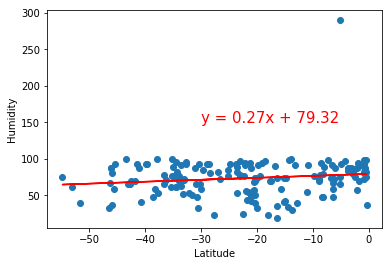

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


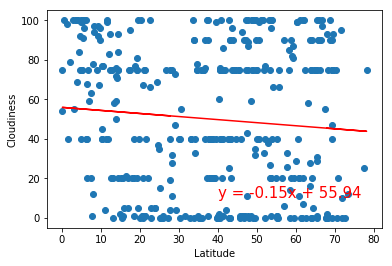

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


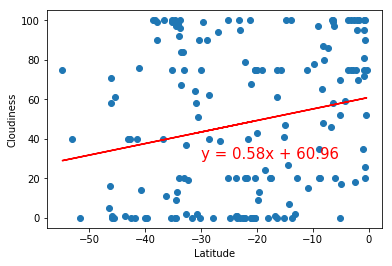

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


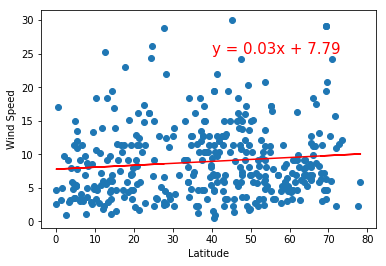

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


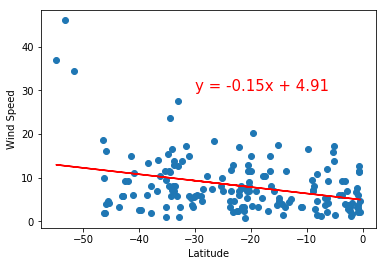